**Penggunaan Library**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import os
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error as mae

**Pembacaan dataset file autos_mpg.csv**

In [ ]:
## Read the Csv file
data = pd.read_csv("autos_mpg.csv")

**Inisiasi variabel df**

In [ ]:
df=data.copy()

**Menampilkan dataset ter-atas**

In [ ]:
# Show the head of the dataFrame 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Menampilkan dataset ter-bawah**

In [ ]:
# Show the Tail of the dataFrame 
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


**Menampilkan jumlah baris dan kolom**

In [ ]:
# Number of rows and columns 
df.shape

(398, 9)

**Menampilkan hasil pengecekan tipe tiap kolom**

In [ ]:
# Summary to all columns 
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,mpg,float64,129,0
1,cylinders,int64,5,0
2,displacement,float64,82,0
3,horsepower,object,94,0
4,weight,int64,351,0
5,acceleration,float64,95,0
6,model_year,int64,13,0
7,origin,int64,3,0
8,car_name,object,305,0


**Mendeskripsikan tiap kolom dan baris dengan bentuk transpose**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


**Pengecekan missing values**

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

**Melakukan drop kolom "car_name" dikarenakan ber-tipe object**

In [ ]:
df = df.drop("car_name",axis=1)

**Melakukan replacement pada kolom "horsepower" dikarenakan ber-tipe object**

In [ ]:
df['horsepower'] = df['horsepower'].replace("?",np.nan)

**Pengubahan tipe "horsepower" menjadi float64**

In [ ]:
df["horsepower"] = df["horsepower"].astype("float64")

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

**Melakukan drop baris yang bernilai NULL dan menampilkan tipe dan perhitungan Non-Null tiap kolom**

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


**Menampilkan relasi dari tiap kolom yang terdapat pada dataset**

In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**Menampilkan relasi tiap kolom dengan heatmap**

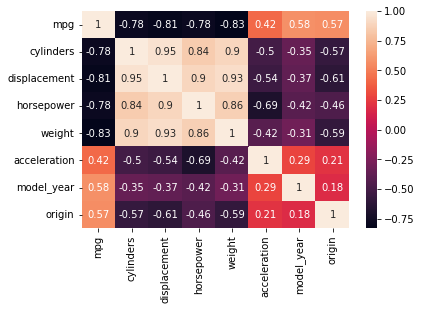

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

**Melakukan penambahan function scatter untuk menampilkan beberapa relasi dengan plot**

In [ ]:
def scatter(df, x, y, ax = None, hue = None, size = None, style = None, alpha = 1):
    """
    This function allows you to plot the scatter plot of 2 variables
    ---
    arguments \
    df: data frame name.
    x: column name to x-axis.
    y: column name to y-axis.
    ax: if there's more than one.
    hue: to add another variable using color.
    size: to add another variable using size.
    style: to add another variable using style.
    """
    g = sns.scatterplot(data = df, x = x, y = y, ax  = ax , hue = hue,
                    size = size, style = style, markers = True, alpha = alpha, palette = "pastel")
    
    # titles
    g.set_title(f"{y} with {x}", fontsize = 17, weight = "bold", fontname = "monospace", pad = 20)
    g.set_xlabel(x, fontsize = 15, weight = "semibold", fontname = "monospace")
    g.set_ylabel(y, fontsize = 15, weight = "semibold", fontname = "monospace")

**Menampilkan relasi antara mpg dengan akselerasi, horsepower, weight, dan displacement**

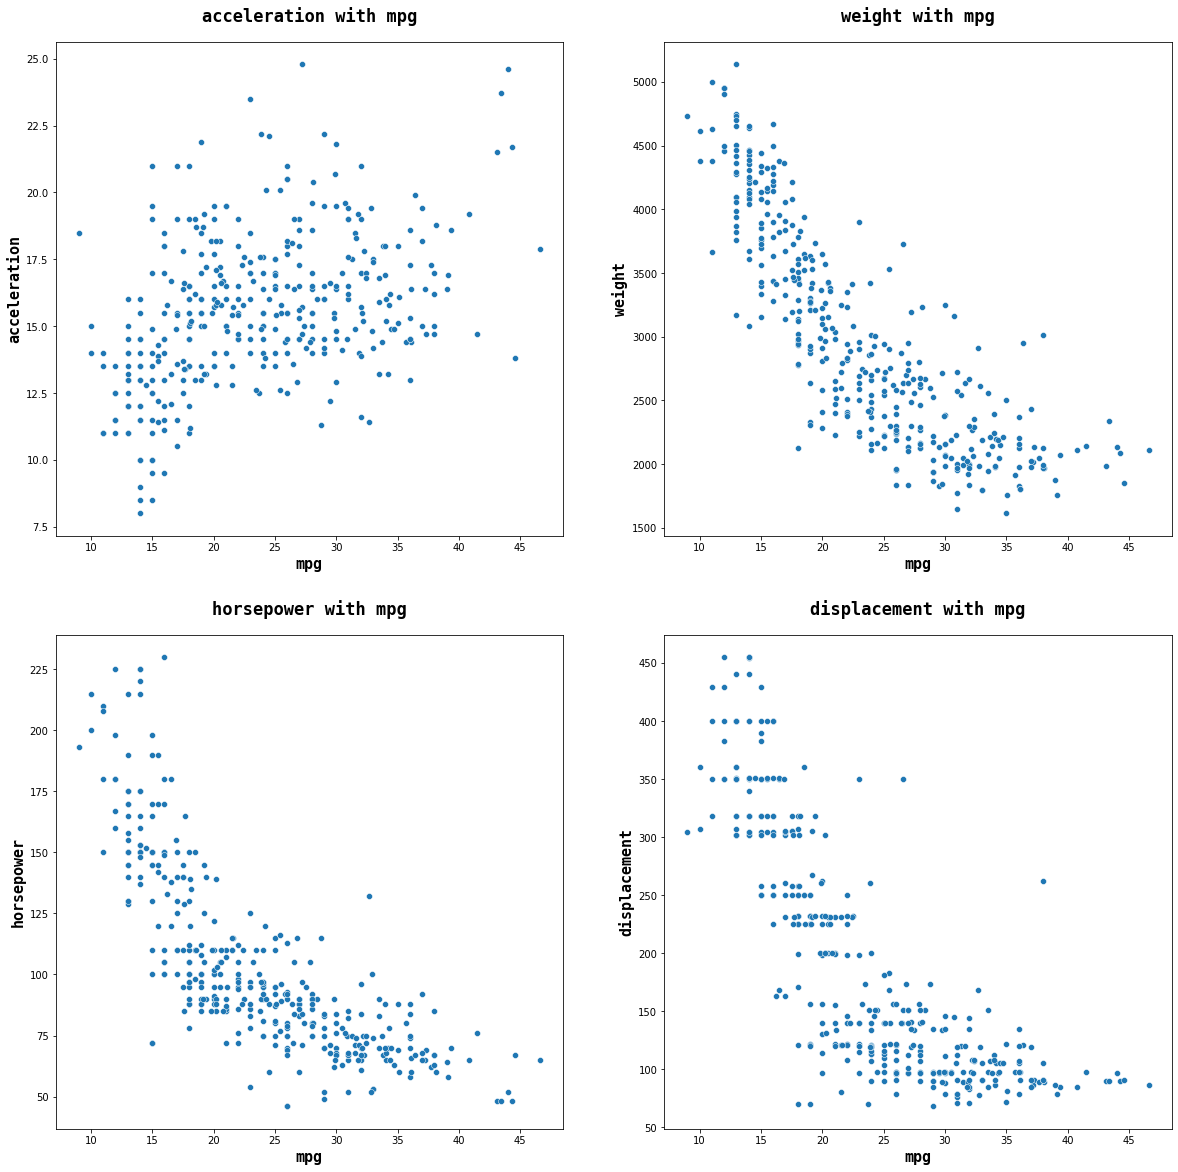

In [ ]:
num_cols = ["acceleration", "horsepower", "weight", "displacement"]
fig, ax = plt.subplots(2,2, figsize = (20, 20))
for i, col in enumerate(num_cols):
    scatter(df, "mpg", col, ax = ax[i%2, i//2])

**Inisiasi variabel x dan y**

In [ ]:
X = df.drop("mpg", axis = 1)
y = df["mpg"]

**Melakukan training test terhadap variabel x dan variabel y**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**Menampilkan data dari hasil x dan y yang sudah di training dan testing sebelumnya**

In [ ]:
for data in (X_train, X_test, y_train, y_test):
    print(data.shape)

(313, 7)
(79, 7)
(313,)
(79,)


**Melakukan proses scalling terhadap variabel x**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Proses bagging dengan menggabungkan algoritma KNN dan Decision Tree**

In [ ]:
regs = [KNeighborsRegressor(), DecisionTreeRegressor()]

model_name = []
model_mae = []

In [ ]:
for reg in regs:
    y_pred = cross_val_predict(reg, X_train, y_train, cv = 3)
    model_name.append(reg.__class__.__name__)
    model_mae.append(mae(y_train, y_pred))

**Melakukan proses evaluasi dengan mae**

In [ ]:
final = pd.DataFrame({"name": model_name,"mae": model_mae})
final.sort_values(by = "mae", inplace = True)
final

,name,mae
0,KNeighborsRegressor,2.287412
1,DecisionTreeRegressor,2.826837


**Hasil prediksi skor**

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae(y_test, y_pred)

2.009113924050633